# Hurricane Track Editor

Quick notebook to edit hurricane tracks to target specific regions

In [1]:
import sys
sys.path.append('/mnt/Work/LaGonaveFM/') # or use path 
sys.path.append('/home/aesgeorges/LaGonaveFM/')
from codebase.tools import *

import pandas as pd

from kalpana.export import fort14togdf

import cmocean
import numpy as np
import netCDF4 as netcdf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cf

## Imports

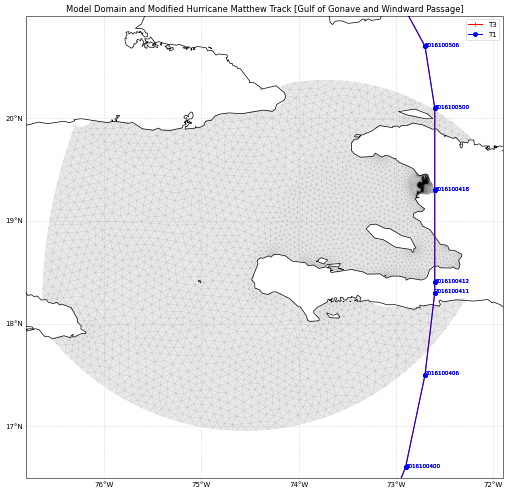

In [7]:
root = '../sims/Gonave_SLR_retreats/r1/SSP1_2100/'
root_base22 = '../sims/Gonave_SLR_mangrove/S0/' #'../staging/runs/Matthew2016_EC95d/'
root_mod = '../staging/runs/Matthew2016_v3c2_rehab/'
fort22path_base = root_base22 + 'fort.22'
fort22path_mod = root + 'fort.22'

test(fort22path_base, fort22path_mod)

## True Hurricane Track Description

In [2]:
def test(fort22path_base, fort22path_mod):
    df = pd.read_csv(fort22path_mod, header=None)

    lat = 0.1 * df[6].str.strip().str.replace('N', '', regex=False).astype(float)
    lon = -0.1 * df[7].str.strip().str.replace('W', '', regex=False).astype(float)

    times = df[2]

    df_base = pd.read_csv(fort22path_base, header=None)

    lat_base = 0.1 * df_base[6].str.strip().str.replace('N', '', regex=False).astype(float)
    lon_base = -0.1 * df_base[7].str.strip().str.replace('W', '', regex=False).astype(float)

    times_base = df_base[2]

    fig, ax = plt.subplots(figsize=(14,12), dpi=50, subplot_kw={'projection': ccrs.PlateCarree()})
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='red', marker='+', label='T3')
    ax.plot(lon_base, lat_base, transform=ccrs.PlateCarree(), color='blue', marker='o', label='T1')
    coast = cf.GSHHSFeature()
    ax.add_feature(coast)
    mesh = fort14togdf(root+'/fort.14', epsgIn=4326, epsgOut=4326, fileintype='fort.14')
    mesh.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.1, alpha=0.5)
    ax.set_title('Model Domain and Modified Hurricane Matthew Track [Gulf of Gonave and Windward Passage]')

    #ax.set_xlim(-72.9, -72.6)
    #ax.set_ylim(19.2, 19.5)

    for x, y, t in zip(lon, lat, times):
        ax.text(x, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='blue', clip_on=True)

    ax.set_extent([-76.8, -71.9, 16.5, 21.])

    ax.legend()

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
    gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)


In [99]:
df = pd.read_csv(fort22path_mod, header=None)

lat = 0.1 * df[6].str.strip().str.replace('N', '', regex=False).astype(float)
lon = -0.1 * df[7].str.strip().str.replace('W', '', regex=False).astype(float)

times = df[2]

In [100]:
df_base = pd.read_csv(fort22path_base, header=None)

lat_base = 0.1 * df_base[6].str.strip().str.replace('N', '', regex=False).astype(float)
lon_base = -0.1 * df_base[7].str.strip().str.replace('W', '', regex=False).astype(float)

times_base = df_base[2]

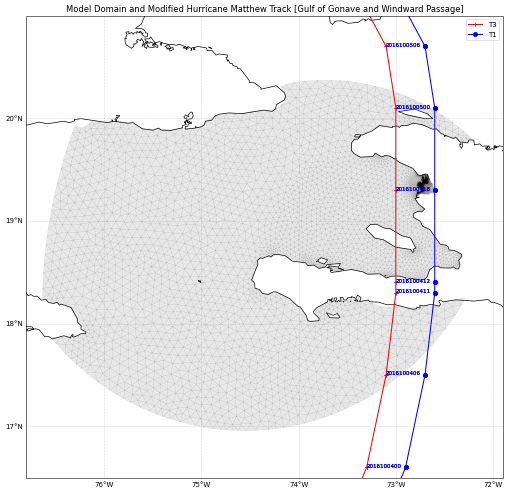

In [103]:
fig, ax = plt.subplots(figsize=(14,12), dpi=50, subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='red', marker='+', label='T3')
ax.plot(lon_base, lat_base, transform=ccrs.PlateCarree(), color='blue', marker='o', label='T1')
coast = cf.GSHHSFeature()
ax.add_feature(coast)
mesh = fort14togdf(root+'/fort.14', epsgIn=4326, epsgOut=4326, fileintype='fort.14')
mesh.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.1, alpha=0.5)
ax.set_title('Model Domain and Modified Hurricane Matthew Track [Gulf of Gonave and Windward Passage]')

#ax.set_xlim(-72.9, -72.6)
#ax.set_ylim(19.2, 19.5)

for x, y, t in zip(lon, lat, times):
    ax.text(x, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='blue', clip_on=True)

ax.set_extent([-76.8, -71.9, 16.5, 21.])

ax.legend()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)

### True Hurricane track stats

For definition of column names see the following link:
[Best Track/Objective Aid/Wind Radii Format](https://science.nrlmry.navy.mil/atcf/docs/database/new/abrdeck.html)

In [5]:
column_names = ['BASIN', 'CY', 'Datetime', 'TECH', 'TAU', 'LAT', 'LON', 'VMAX', 'MSLP', 'TY', 'RAD', 'WINDCONE', 'RAD1', 'RAD2', 'RAD3', 'RAD4', 'RADP', 'RRP', 'MRD', 'GUSTS', 'EYE', 'SUBREGION', 'MAXSEAS', 'INITIALS', 'DIR', 'STORMNAME', 'SEAS']

In [6]:
df = df.drop(columns=[3,24])

In [7]:
df.columns = column_names
stats_df = df.loc[60:83] #dataframe containing hurricane data during its domain traversal
stats_df

,BASIN,CY,Datetime,TECH,TAU,LAT,LON,VMAX,MSLP,TY,...,RRP,MRD,GUSTS,EYE,SUBREGION,MAXSEAS,INITIALS,DIR,STORMNAME,SEAS
60,AL,14,2016100400,BEST,126,166N,746W,130,934,HU,...,250,15,150,15,L,0.0,22,4,MATTHEW,23
61,AL,14,2016100400,BEST,132,166N,746W,130,934,HU,...,250,15,150,15,L,0.0,22,4,MATTHEW,23
62,AL,14,2016100400,BEST,132,166N,746W,130,934,HU,...,250,15,150,15,L,0.0,22,4,MATTHEW,23
63,AL,14,2016100406,BEST,132,175N,744W,130,934,HU,...,250,15,150,15,L,0.0,12,5,MATTHEW,24
64,AL,14,2016100406,BEST,138,175N,744W,130,934,HU,...,250,15,150,15,L,0.0,12,5,MATTHEW,24
65,AL,14,2016100406,BEST,138,175N,744W,130,934,HU,...,250,15,150,15,L,0.0,12,5,MATTHEW,24
66,AL,14,2016100411,BEST,138,183N,743W,130,935,HU,...,250,15,0,0,,0.0,7,5,MATTHEW,25
67,AL,14,2016100411,BEST,143,183N,743W,130,935,HU,...,250,15,0,0,,0.0,7,5,MATTHEW,25
68,AL,14,2016100411,BEST,143,183N,743W,130,935,HU,...,250,15,0,0,,0.0,7,5,MATTHEW,25
69,AL,14,2016100412,BEST,143,184N,743W,125,937,HU,...,250,15,150,15,L,0.0,0,3,MATTHEW,26


In [37]:
stats_df['RAD_AVG_HURR'] = (stats_df[stats_df['RAD']==64])[['RAD1', 'RAD2', 'RAD3', 'RAD4']].mean(axis=1)
stats_df['RAD_AVG_STRM'] = (stats_df[stats_df['RAD']==34])[['RAD1', 'RAD2', 'RAD3', 'RAD4']].mean(axis=1)

In [ ]:
stats_df[['VMAX', 'MSLP', 'RAD', 'GUSTS', 'MRD', 'RAD_AVG_HURR', 'RAD_AVG_STRM']].describe()
# VMAX Maximum sustained wind speed in knots: 0 through 300. 
# MSLP Minimum sea level pressure, 1 through 1100 MB. 
# RAD Wind intensity (kts) for the radii defined in this record: 34, 50, 64.
# MRD Radius of Max Winds at eyewall (nautical miles)
# RAD_AVG_HURR Average Extent of hurricane-force winds (nm)
# RAD_AVG_STRM Average Extent of storm-force winds (nm)

,VMAX,MSLP,RAD,GUSTS,MRD,RAD_AVG_HURR,RAD_AVG_STRM
count,24.000000,24.000000,24.000000,24.000000,24.0,8.000000,8.000000
mean,120.625000,944.750000,49.333333,125.000000,15.0,35.312500,124.687500
std,9.361403,11.069936,12.520129,49.321483,0.0,3.455715,3.881619
min,105.000000,934.000000,34.000000,0.000000,15.0,31.250000,117.500000
25%,113.750000,934.750000,34.000000,131.250000,15.0,32.500000,123.750000
50%,122.500000,942.000000,50.000000,147.500000,15.0,34.375000,126.250000
75%,130.000000,951.750000,64.000000,150.000000,15.0,38.125000,127.500000
max,130.000000,962.000000,64.000000,150.000000,15.0,40.000000,127.500000


In [42]:
stats_df['RAD_AVG_STRM'].describe()

count      8.000000
mean     124.687500
std        3.881619
min      117.500000
25%      123.750000
50%      126.250000
75%      127.500000
max      127.500000
Name: RAD_AVG_STRM, dtype: float64

### Track Modification Figures

In [ ]:
df_mod = pd.read_csv(fort22path_mod, header=None)

lat_mod = 0.1 * df_mod[6].str.strip().str.replace('N', '', regex=False).astype(float)
lon_mod = -0.1 * df_mod[7].str.strip().str.replace('W', '', regex=False).astype(float)

times_mod = df_mod[2]

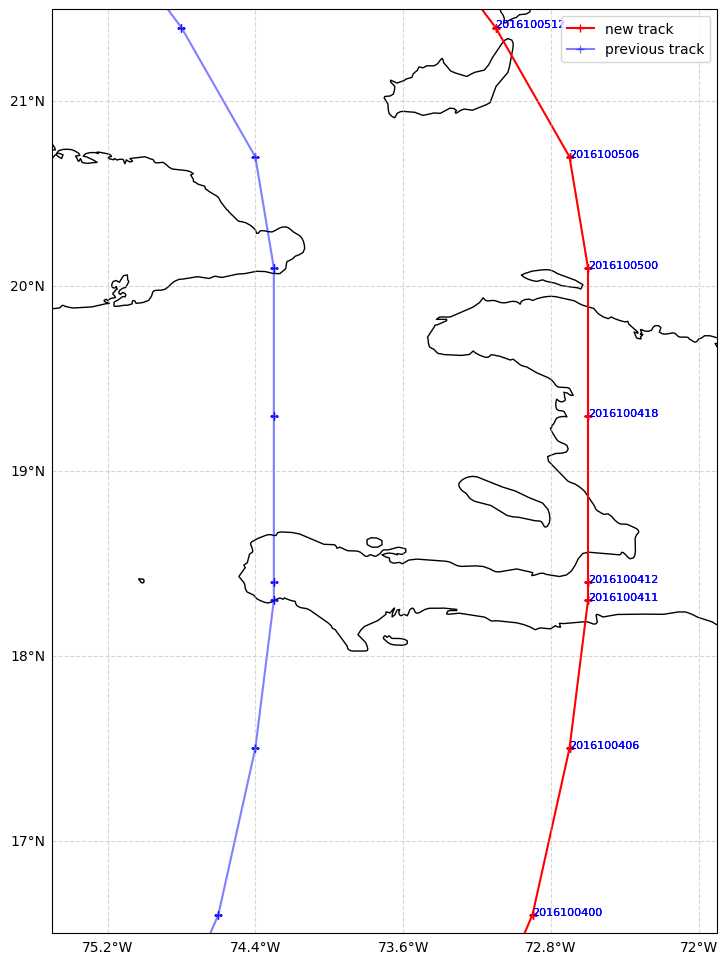

In [26]:
fig, ax = plt.subplots(figsize=(14,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon_mod, lat_mod, transform=ccrs.PlateCarree(), color='red', marker='+', label='new track')
ax.plot(lon, lat, transform=ccrs.PlateCarree(), alpha=0.5, color='blue', marker='+', label='previous track')
ax.legend()
ax.coastlines()

for x, y, t in zip(lon_mod, lat_mod, times_mod):
    ax.text(x, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='blue', clip_on=True)

ax.set_extent([-75.5, -71.9, 16.5, 21.5])


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)

In [67]:
lat_test = 0.1 * df['LAT'].str.strip().str.replace('N', '', regex=False).astype(float)
lon_test = -0.1 * df['LON'].str.strip().str.replace('W', '', regex=False).astype(float)

lon_test_1 = lon_test + 1.7
lon_test_2 = lon_test + 1.5
lon_test_3 = lon_test + 1.3

lons = [lon_test_1, lon_test_2, lon_test_3]


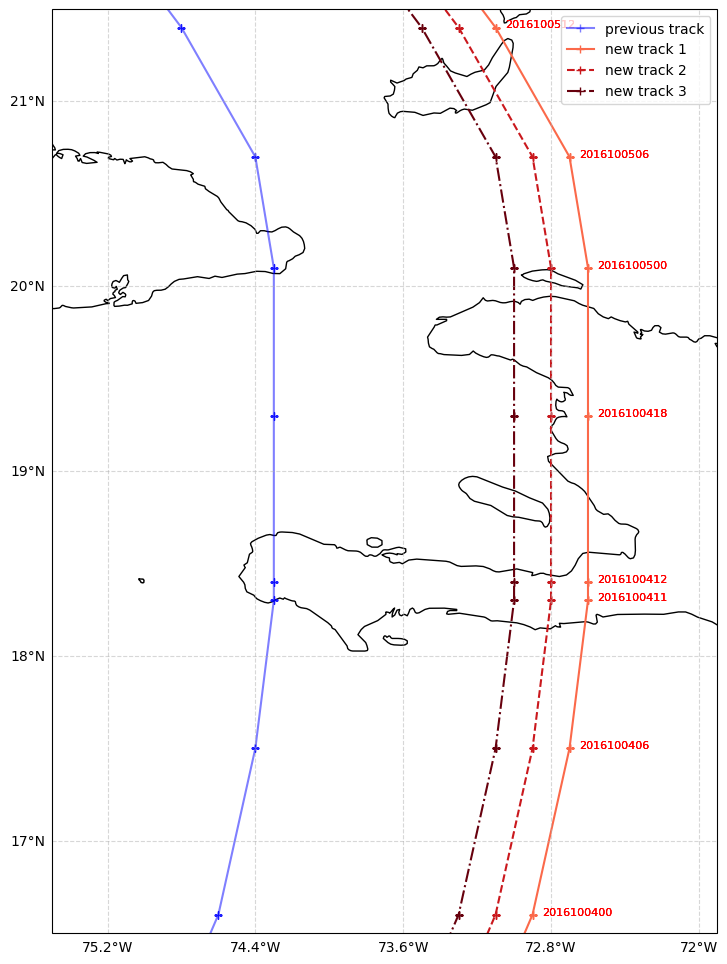

In [79]:
fig, ax = plt.subplots(figsize=(14,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon, lat, transform=ccrs.PlateCarree(), alpha=0.5, color='blue', marker='+', label='previous track')

custom_styles = ['solid', 'dashed', 'dashdot']
colors = plt.get_cmap('Reds')(np.linspace(0.5, 1, 3))
for i, lon_t in enumerate(lons):
    ax.plot(lon_t, lat_test, transform=ccrs.PlateCarree(), marker='+', linestyle=custom_styles[i], color=colors[i], label=f'new track {i+1}')

ax.legend()
ax.coastlines()

for x, y, t in zip(lon_mod, lat_mod, times_mod):
    ax.text(x+0.05, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='red', clip_on=True)

ax.set_extent([-75.5, -71.9, 16.5, 21.5])


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)

## Track Edit and Visualization

In [56]:
def shift_hurricane_track_output(input_file, output_file, shift):
    # Read the input file
    with open(input_file, 'r') as f:
        lines = f.readlines()
    
    # Process each line
    modified_lines = []
    for line in lines:
        # Use regular expression to find all instances of numbers followed by W
        import re
        modified_line = line
        # Find all occurrences of digits followed by W
        matches = re.findall(r'(\d+)W', line)
        for match in matches:
            # Convert to integer
            old_value = int(match)
            # Subtract 10 (1 degree eastward)
            new_value = old_value - shift
            # Replace in the line
            modified_line = modified_line.replace(f"{old_value}W", f"{new_value}W")
        
        modified_lines.append(modified_line)
    
    # Write the modified content to the output file
    with open(output_file, 'w') as f:
        f.writelines(modified_lines)
    
    print(f"Track shifted {shift/10} degree eastward and saved to {output_file}")
    
    # Print a sample of the modifications for verification
    print("\nSample of modifications:")
    for i in range(min(5, len(lines))):
        old_match = re.search(r'(\d+)W', lines[i])
        new_match = re.search(r'(\d+)W', modified_lines[i])
        if old_match and new_match:
            print(f"Line {i+1}: {old_match.group(0)} -> {new_match.group(0)}")

# Example usage
shift = 13 # 13 -> 1.3 degrees
input_file = "../hurricane_track_gen/matthew.22"
output_file = "../hurricane_track_gen/matthew_track3.22"
shift_hurricane_track_output(input_file, output_file, shift)

Track shifted 1.3 degree eastward and saved to ../hurricane_track_gen/matthew_track3.22

Sample of modifications:
Line 1: 745W -> 732W
Line 2: 745W -> 732W
Line 3: 745W -> 732W
Line 4: 745W -> 732W
Line 5: 745W -> 732W


In [57]:
#output_file = "../hurricane_track_gen/matthew_track1.22"

In [58]:
df_vis = pd.read_csv(output_file, header=None)

lat_vis = 0.1 * df_vis[6].str.strip().str.replace('N', '', regex=False).astype(float)
lon_vis = -0.1 * df_vis[7].str.strip().str.replace('W', '', regex=False).astype(float)

times_vis = df_vis[2]

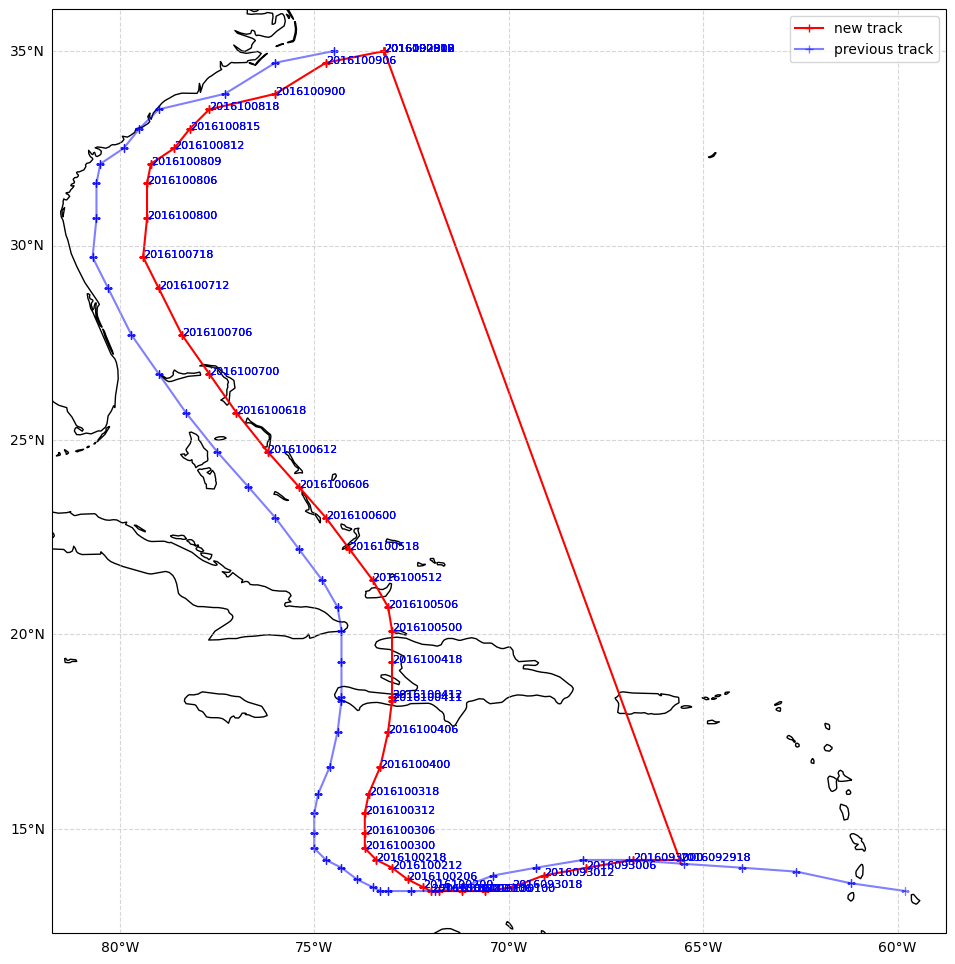

In [59]:
fig, ax = plt.subplots(figsize=(14,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon_vis, lat_vis, transform=ccrs.PlateCarree(), color='red', marker='+', label='new track')
ax.plot(lon, lat, transform=ccrs.PlateCarree(), alpha=0.5, color='blue', marker='+', label='previous track')
ax.legend()
ax.coastlines()

for x, y, t in zip(lon_vis, lat_vis, times_vis):
    ax.text(x, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='blue', clip_on=True)

#ax.set_extent([-75.5, -71.9, 16.5, 21.5])


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)

In [64]:
df_vis = df_vis.drop(columns=[3,24])
df_vis.columns = column_names
stats_df = df_vis.loc[60:83] #dataframe containing hurricane data during its domain traversal
stats_df

ValueError: Length mismatch: Expected axis has 45 elements, new values have 27 elements